In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study_info = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_study_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(complete_study_info["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#duplicate_mice_timepoint = complete_study_info.iloc[[0,5]]

duplicate_rows = complete_study_info.loc[complete_study_info.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


In [4]:
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID
# duplicate_mice_timepoint = complete_study_info[complete_study_info.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
# display(duplicate_mice_timepoint)

In [6]:
x = complete_study_info.loc[complete_study_info["Mouse ID"]=='g989']
x

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = complete_study_info.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
#display(clean_df)

In [8]:
clean_df=  complete_study_info.loc[complete_study_info["Mouse ID"]!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
#clean_df = mice_timepoint[mice_timepoint.duplicated(keep=False)]
#display(clean_df)

updated_mice_count = len(clean_df["Mouse ID"].unique())

updated_mice_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [11]:
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Variance
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
display(variance)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
display(sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
stats = pd.DataFrame({
    "mean": mean,
    "median": median,
    "variance": variance,
    "std": std,
    "sem": sem
})

display(stats)

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

In [18]:
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])
display(summary_stats)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

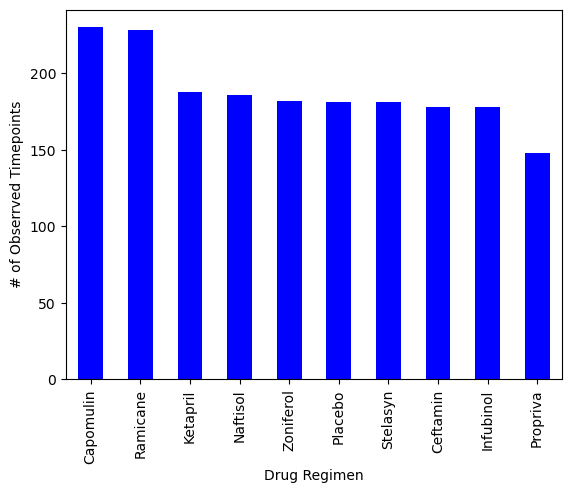

In [20]:
drugs_timepoint = clean_df.groupby('Drug Regimen')['Timepoint'].count()
drugs_timepoint.sort_values(ascending=False, inplace=True)

drugs_timepoint.plot(kind='bar',
        xlabel= 'Drug Regimen',
        ylabel= '# of Obserrved Timepoints',
        color= 'blue'
       )
plt.show()

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

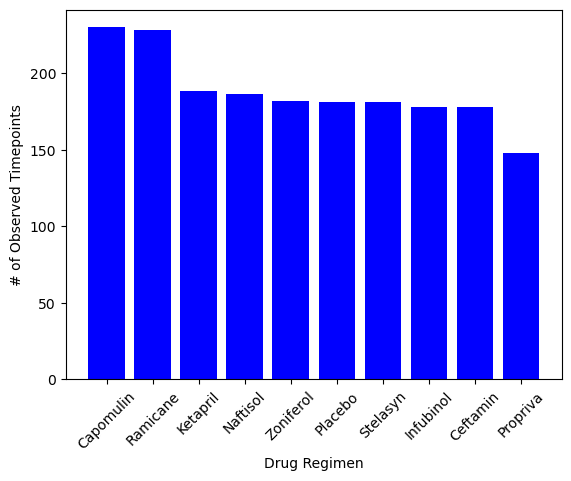

In [22]:
drugs = clean_df['Drug Regimen'].value_counts()

plt.bar(drugs.index.values, drugs.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

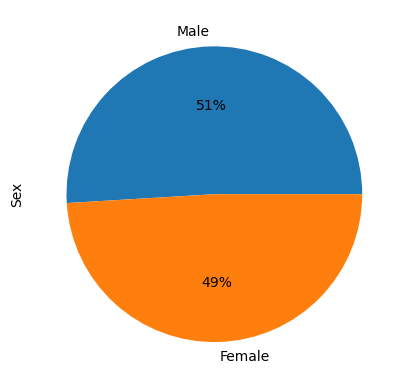

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = clean_df['Sex'].value_counts()

sex.plot(kind='pie', y='Sex', autopct='%1.0f%%')

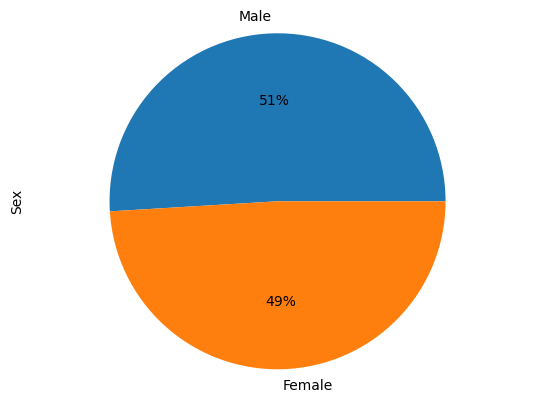

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, labels=sex.index, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers, and Boxplots

In [25]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [26]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = max_timepoint.merge(clean_df, how="left", on=["Mouse ID", "Mouse ID"])
last_timepoint


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Add a for loop throught the previous made (treatment list)
    # Locate the rows which contain mice on each drug and get the tumor volumes (have series)
    # add subset (adding series to empty list [])
    # Determine outliers using upper and lower bounds (get outliers for series as you are looping)
    # empty list should have 4 series
    
for drugs in treatments:
    tumor_vol = last_timepoint.loc[last_timepoint["Drug Regimen"]==drugs, "Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_vol)
    quartiles = tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drugs}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: 1378    25.472143
1379    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 796    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


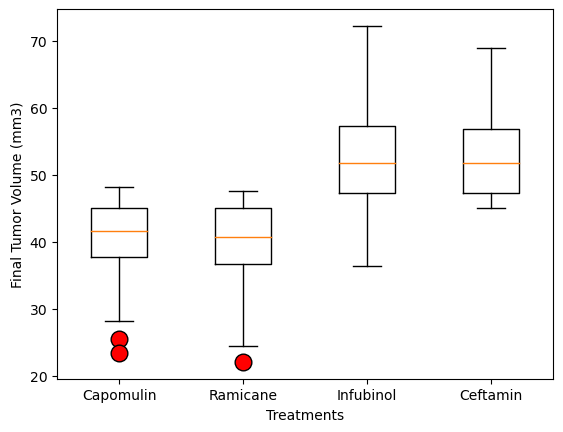

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
# plot. Set color of marker edge
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
#plt.boxplot(data, flierprops=flierprops)
ax1.boxplot(tumor_vol_list, flierprops=flierprops)
ax1.set_xlabel('Treatments')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol', 'Ceftamin'])
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

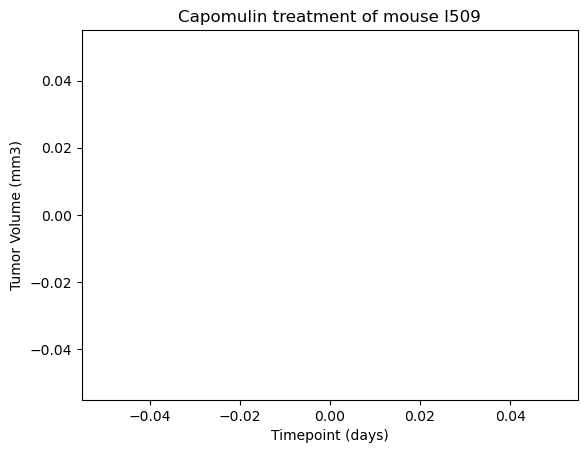

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#complete_study_info.loc[complete_study_info["Mouse ID"]=='g989']
capomulin = clean_df[clean_df.iloc[:,1]=='Capomulin']
#mouse_I509 = capomulin[capomulin.iloc[:,]=='i509']
mouse_I509 = capomulin.loc[capomulin["Mouse ID"]=='i509']
plt.plot(mouse_I509['Timepoint'], mouse_I509['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [30]:
mouse_I509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


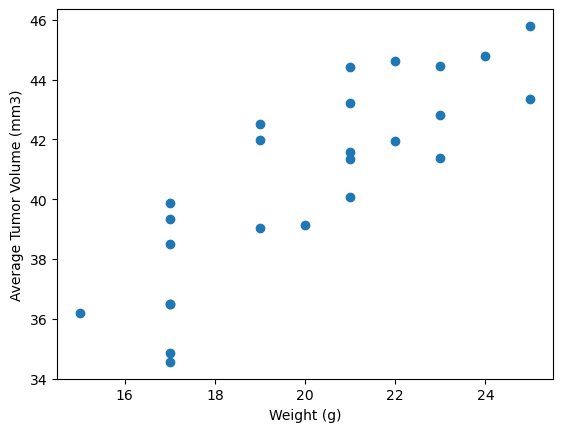

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_capomulin = capomulin.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(average_capomulin["Weight (g)"],average_capomulin["Tumor Volume (mm3)"])
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

The correlation between mouse weight and the average tumor volume is 0.84


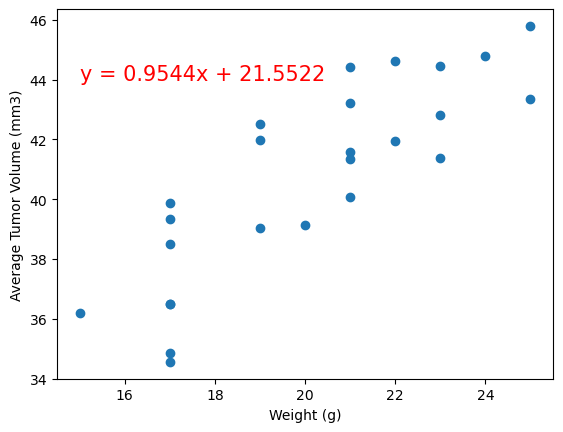

In [38]:
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Tumor Volume (mm3)']

results= st.linregress(x_values, y_values)

correlation = round(results.rvalue, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")


#regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(results.slope,4)) + "x + " + str(round(results.intercept,4))

#m=round(results.slope,4)
#c=round(results.intercept,4)
#y = c + m * x
#line_eq = "y = " + str(m) + "x + " + str(c)
plt.scatter(x_values,y_values)
#plt.plot(x_values,y, c="r")
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()